In [1]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163745 sha256=622ab3eae35c4e5645035d7b0026b6cacd58017142bdce8bd489075a2d5c9fde
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNBasic, KNNBaseline
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [3]:
#Load Movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [4]:
#Variables for algorithms
algo_svd = SVD()
algo_svdpp = SVDpp()
algo_nmf = NMF()
algo_knnbasic = KNNBasic()
algo_knnbaseline = KNNBaseline()

In [5]:
#Cross-validation
cv_svd = cross_validate(algo_svd, data, measures=["rmse"], cv=4, verbose=True)
cv_svdpp = cross_validate(algo_svdpp, data, measures=["rmse"], cv=4, verbose=True)
cv_nmf = cross_validate(algo_nmf, data, measures=["rmse"], cv=4, verbose=True)
cv_knnbasic = cross_validate(algo_knnbasic, data, measures=["rmse"], cv=4, verbose=True)
cv_knnbaseline = cross_validate(algo_knnbaseline, data, measures=["rmse"], cv=4, verbose=True)

Evaluating RMSE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9320  0.9396  0.9459  0.9365  0.9385  0.0050  
Fit time          2.38    2.11    1.33    1.39    1.80    0.45    
Test time         0.34    0.24    0.24    0.28    0.27    0.04    
Evaluating RMSE of algorithm SVDpp on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9212  0.9221  0.9229  0.9184  0.9211  0.0017  
Fit time          24.14   23.62   27.88   28.28   25.98   2.11    
Test time         5.97    6.69    5.00    6.04    5.92    0.60    
Evaluating RMSE of algorithm NMF on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9632  0.9642  0.9608  0.9745  0.9657  0.0053  
Fit time          2.29    1.98    1.97    1.98    2.06    0.14    
Test time         0.23    0.23    0.13    0.24    0.21    0.04    
Computing the msd similarity matrix...
Done com

In [6]:
#Find mean of RMSE
rmse_svd = cv_svd['test_rmse'].mean()
rmse_svdpp = cv_svdpp['test_rmse'].mean()
rmse_nmf = cv_nmf['test_rmse'].mean()
rmse_knnbasic = cv_knnbasic['test_rmse'].mean()
rmse_knnbaseline = cv_knnbaseline['test_rmse'].mean()

print(f"SVD = {rmse_svd}")
print(f"SVDpp = {rmse_svdpp}")
print(f"NMF = {rmse_nmf}")
print(f"KNNBasic = {rmse_knnbasic}")
print(f"KNNBaseline = {rmse_knnbaseline}")

SVD = 0.9384858178729564
SVDpp = 0.9211418292599303
NMF = 0.9656997875019568
KNNBasic = 0.9823734689216055
KNNBaseline = 0.931617550062358


# **Висновки:** після оцінки всіх п'яти алгоритмів було помічено, що SVDpp показав найнижче значення RMSE серед них. Цей результат свідчить про те, що в контексті набору даних Movielens алгоритм SVDpp є найоптимальнішим відносно точності прогнозування та продуктивності.

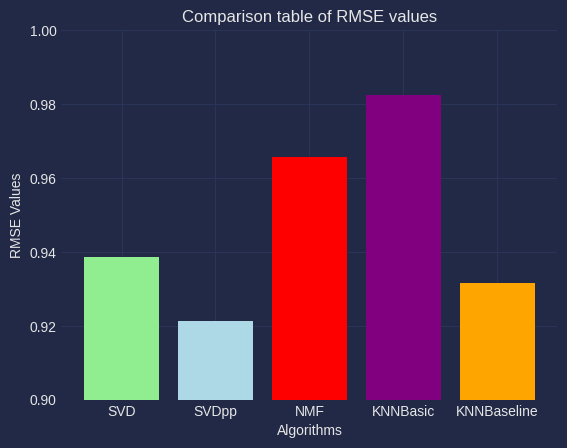

In [7]:
rmse_variables = [rmse_svd, rmse_svdpp, rmse_nmf, rmse_knnbasic, rmse_knnbaseline]
algos = ["SVD", "SVDpp", "NMF", "KNNBasic", "KNNBaseline"]
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.bar(algos, rmse_variables, color=['lightgreen', 'lightblue', 'red', 'purple', 'orange'])
plt.title("Comparison table of RMSE values")
plt.xlabel("Algorithms")
plt.ylabel("RMSE Values")
plt.ylim(0.9, 1.0)
plt.show()